##**Importing my drive and all necessary modules**

In [ ]:
try:
    import scikeras
except ImportError:
    !pip install scikeras


try:
    import researchpy as rp
except ImportError:
    !pip install researchpy

import researchpy as rp
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.models import Model
from imblearn.over_sampling import RandomOverSampler
import pickle
from scikeras.wrappers import KerasClassifier
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight

##**Mounting the drive**


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


###**Reading the .csv file**


To read the CSV file, I also want to store it in a data frame. So in order for me to store it in a data frame, I would first import the pandas module.


In [ ]:
import pandas as pd

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

#**Now I would check to see the structure of my whole dataset**

#**Understanding the relationship between the variables in my dataset**

In [ ]:
variables_to_draw = []
for col in customers.columns:
    if customers.dtypes[col] == 'object':
        variables_to_draw.append(col)

variables_to_draw.remove('customerID')
variables_to_draw.remove('TotalCharges')
variables_to_draw.remove('Churn')
distributions_to_focus_on = customers[variables_to_draw].copy()
distributions_to_focus_on

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


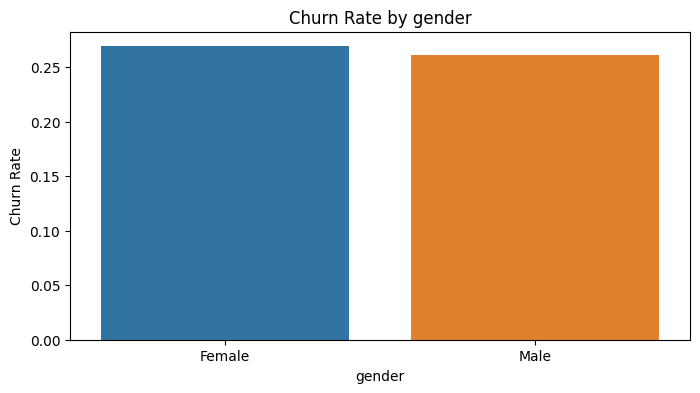

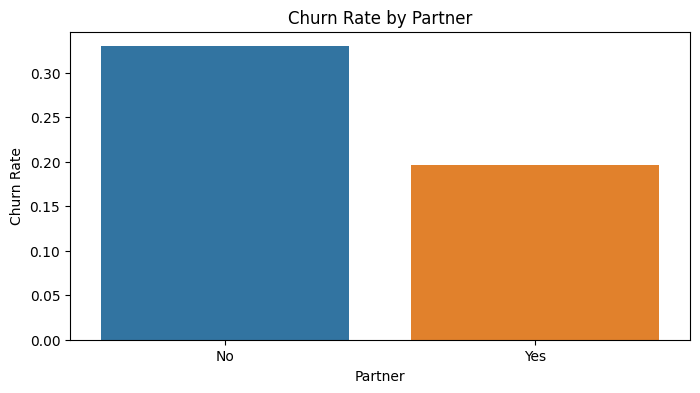

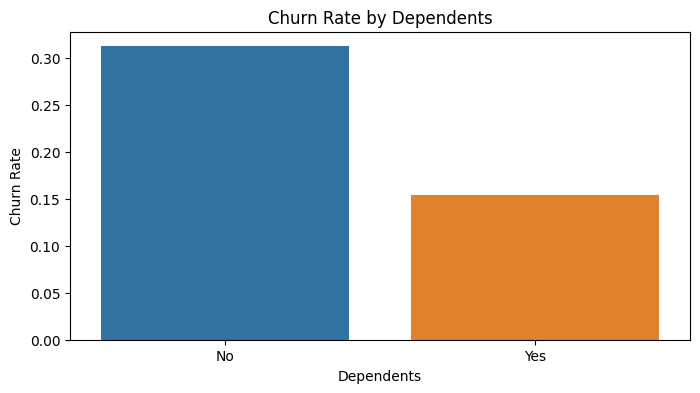

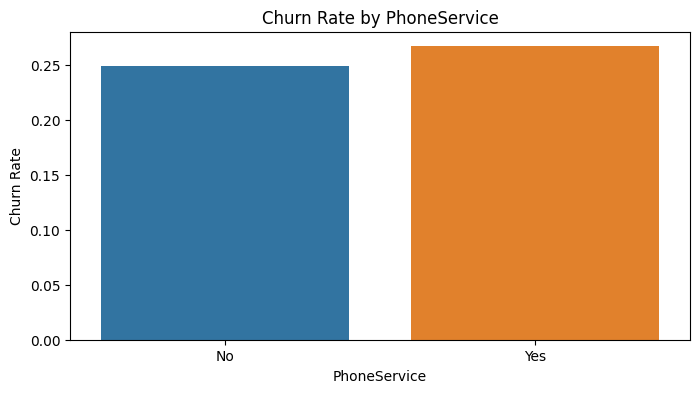

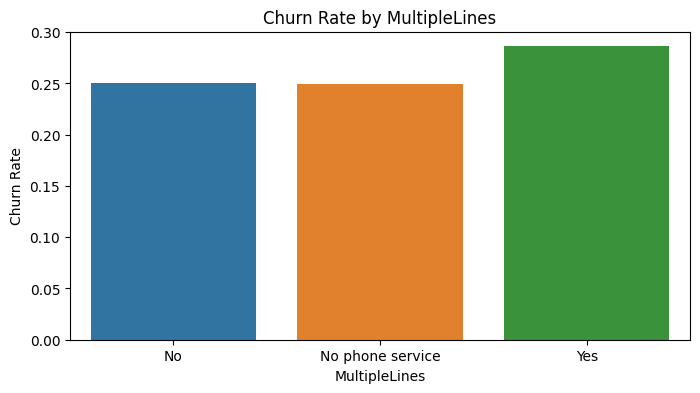

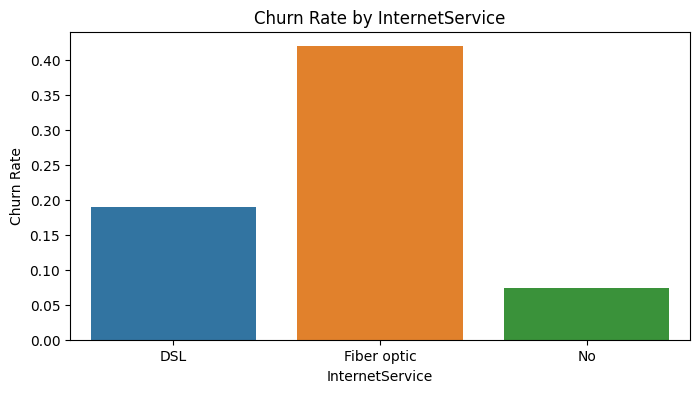

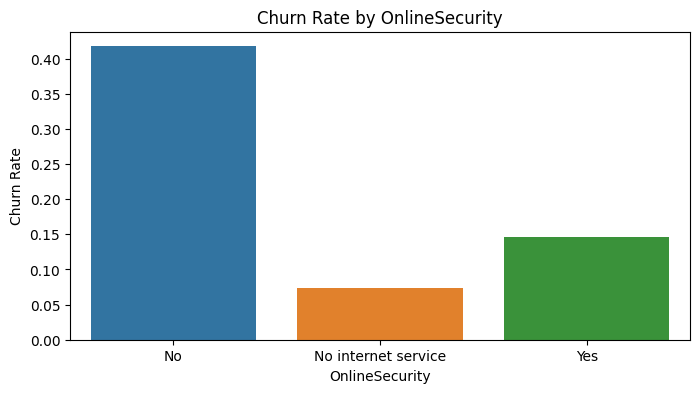

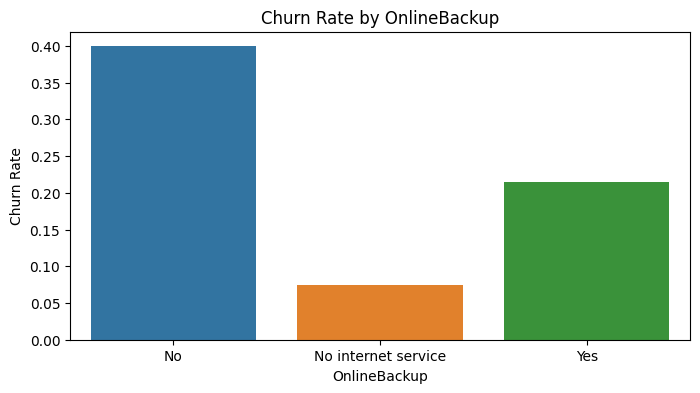

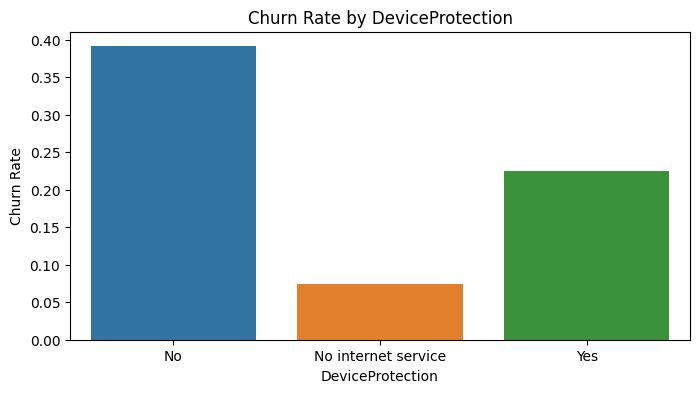

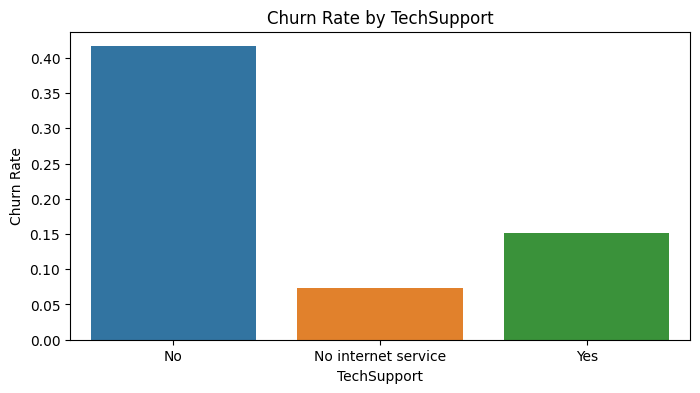

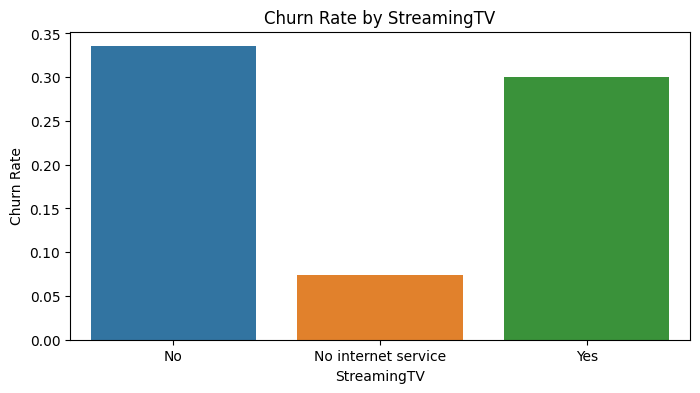

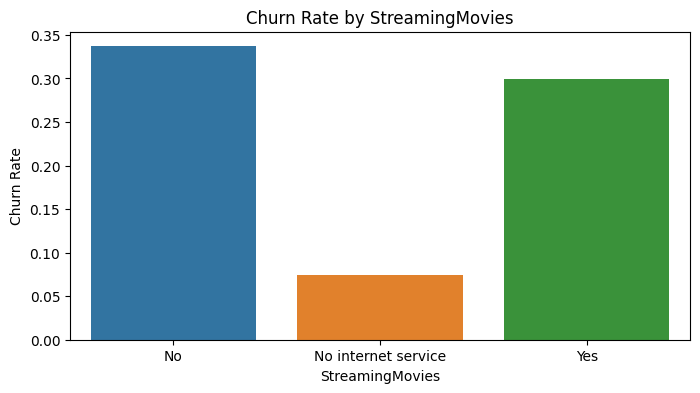

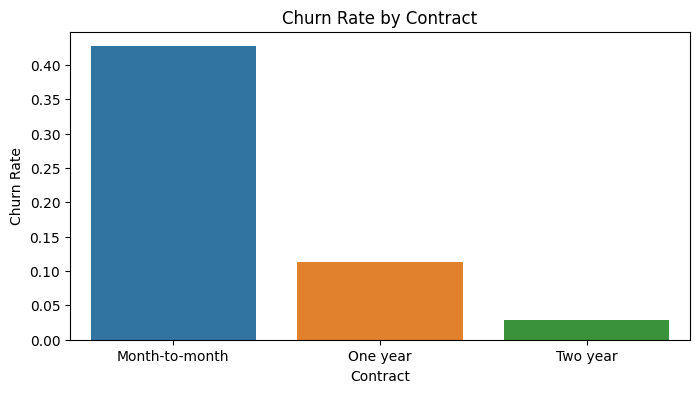

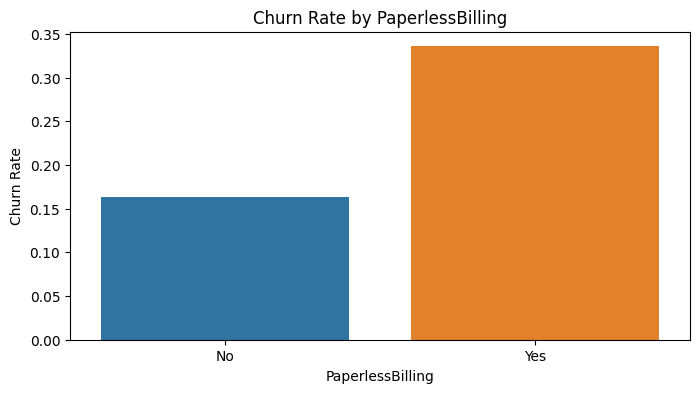

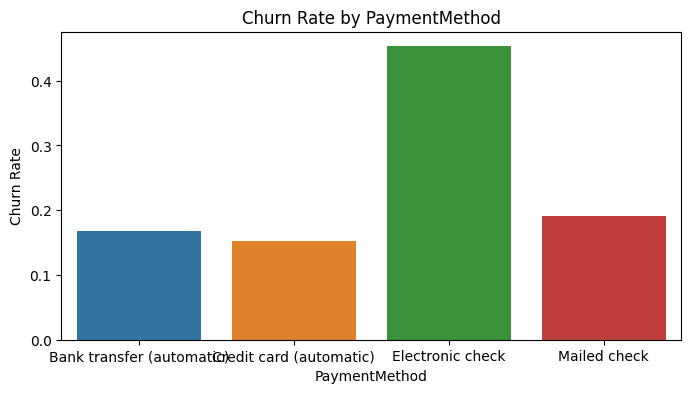

In [ ]:
for var in variables_to_draw:
    churn_rate = customers.groupby(var)['Churn'].value_counts(normalize=True).unstack()
    churn_rate = churn_rate['Yes']  # Assuming 'Yes' is the label for churned customers

    plt.figure(figsize=(8, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {var}')
    plt.ylabel('Churn Rate')
    plt.show()

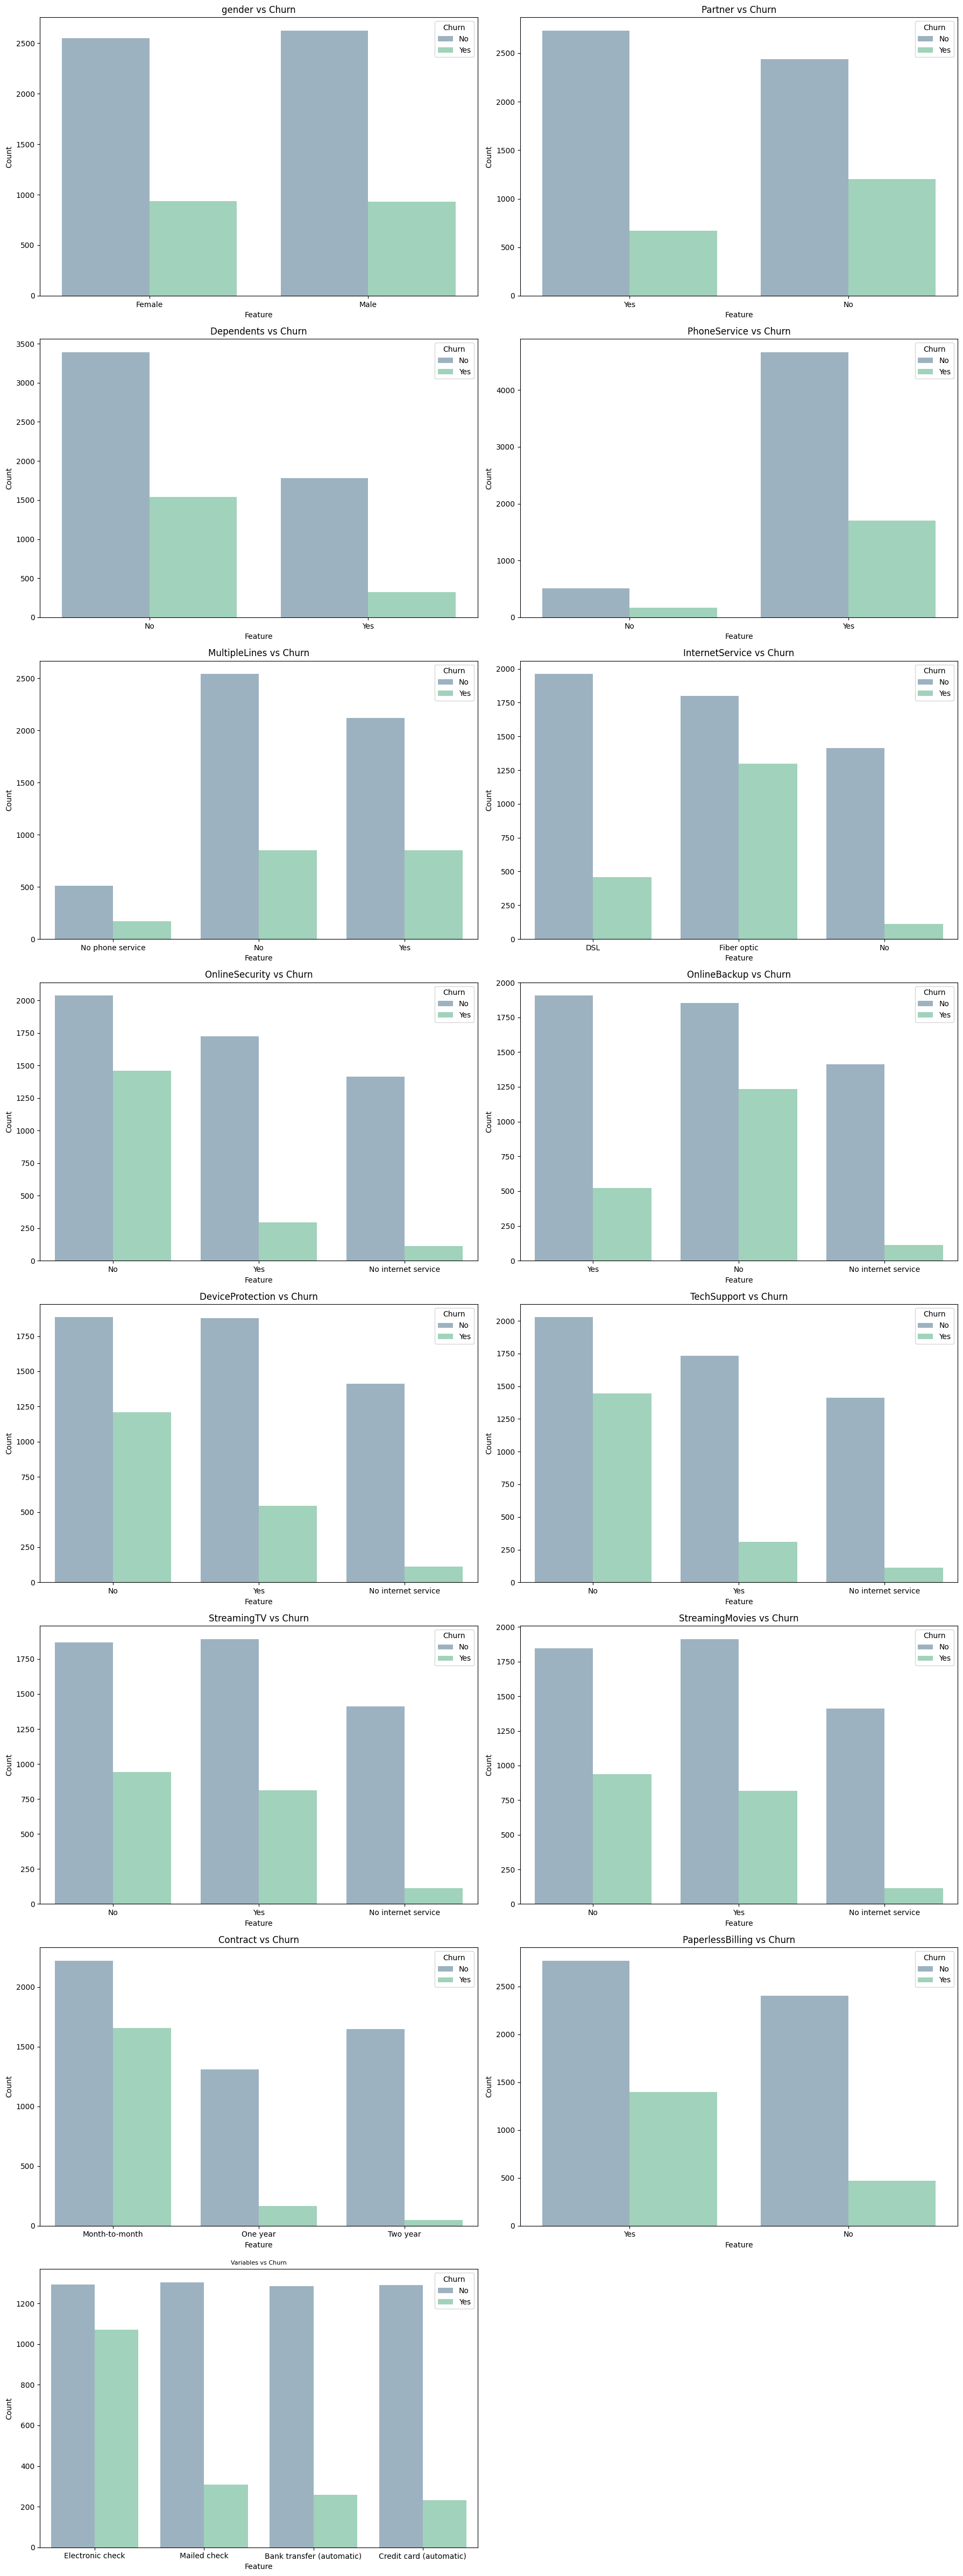

In [ ]:
# Assuming 'variables_to_draw' is a list of your variables and 'customers' is your DataFrame
num_variables = len(variables_to_draw)
n_rows = (num_variables + 1) // 2  # Determine the number of rows needed for the subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(18, n_rows * 6))  # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(variables_to_draw):
    sns.countplot(x=feature, hue='Churn', data=customers, palette='viridis', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', loc='upper right')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.title('Variables vs Churn', fontsize=8)
plt.tight_layout()
plt.show()


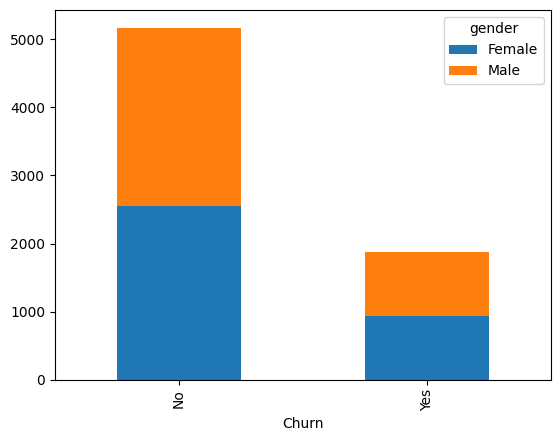

In [ ]:
contingency_table = pd.crosstab(customers['Churn'], customers['gender'])
contingency_table.plot(kind='bar', stacked=True)
plt.show()

<Axes: ylabel='Churn'>

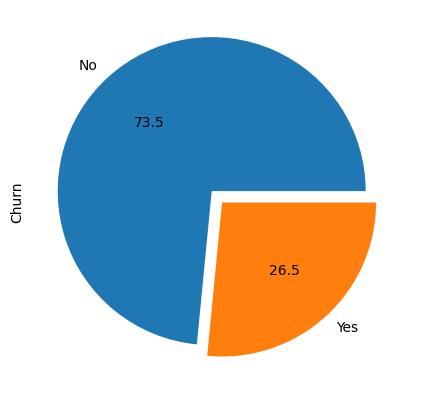

In [ ]:
plt.figure(figsize=(5,5))
customers.Churn.value_counts().plot(kind='pie',autopct='%1.1f',explode=(0.1,0))

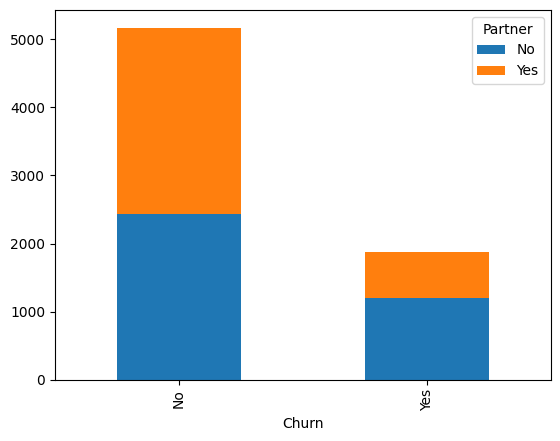

In [ ]:
contingency_table = pd.crosstab(customers['Churn'], customers['Partner'])
contingency_table.plot(kind='bar', stacked=True)
plt.show()

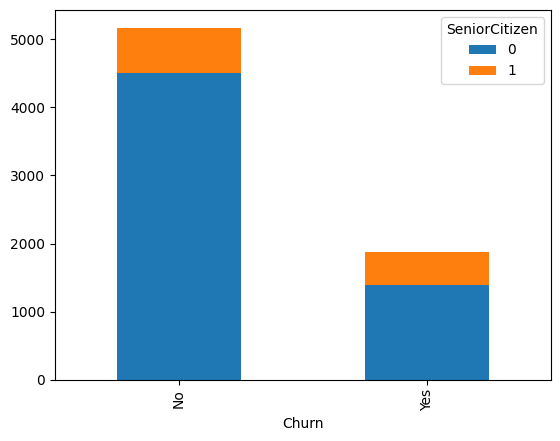

In [ ]:
contingency_table = pd.crosstab(customers['Churn'], customers['SeniorCitizen'])
contingency_table.plot(kind='bar', stacked=True)
plt.show()

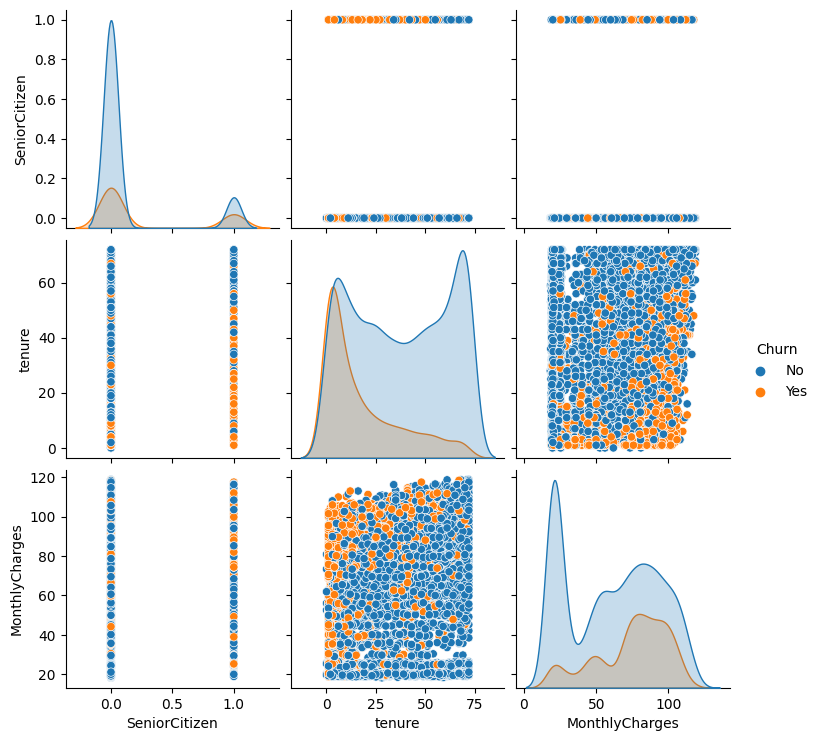

In [ ]:
import seaborn as sns

# Visualizing relationships between features
sns.pairplot(data=customers, hue='Churn')

In [ ]:
non_categorical_variable_to_use = []
for col in customers.columns:
    if customers.dtypes[col] == 'int64':
      non_categorical_variable_to_use.append(col)
    elif customers.dtypes[col] == 'float64':
      non_categorical_variable_to_use.append(col)

In [ ]:
numerical_customers_churn = customers[non_categorical_variable_to_use].copy()
numerical_customers_churn['Churn'] = customers['Churn']
numerical_customers_churn['Churn'] = numerical_customers_churn['Churn'].map({'Yes': 1, 'No': 0})

<ipython-input-15-bd0aa3c2b380>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 1][Col], label='Churned', shade=True)
<ipython-input-15-bd0aa3c2b380>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 0][Col], label='Not Churned', shade=True)


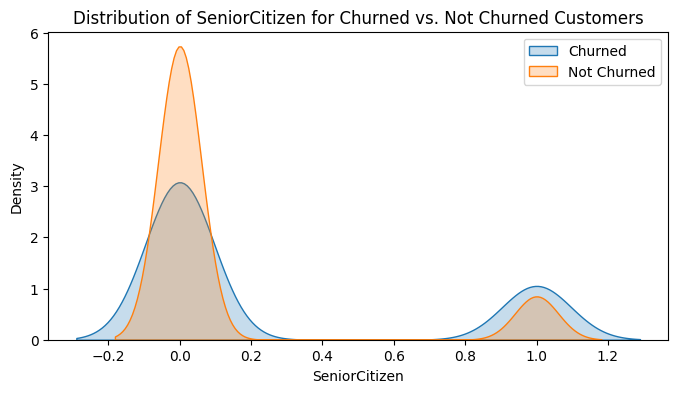

<ipython-input-15-bd0aa3c2b380>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 1][Col], label='Churned', shade=True)
<ipython-input-15-bd0aa3c2b380>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 0][Col], label='Not Churned', shade=True)


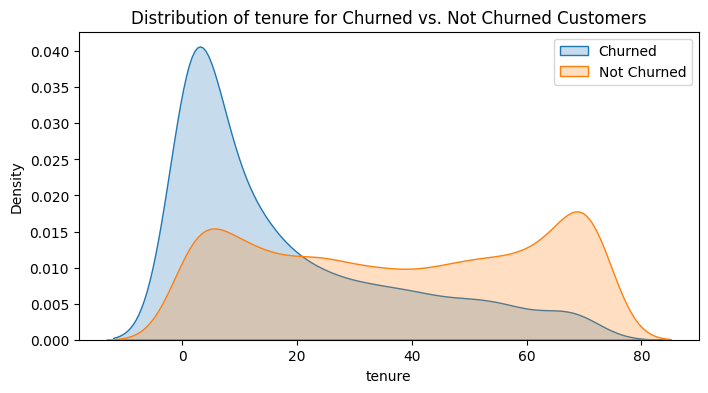

<ipython-input-15-bd0aa3c2b380>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 1][Col], label='Churned', shade=True)
<ipython-input-15-bd0aa3c2b380>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 0][Col], label='Not Churned', shade=True)


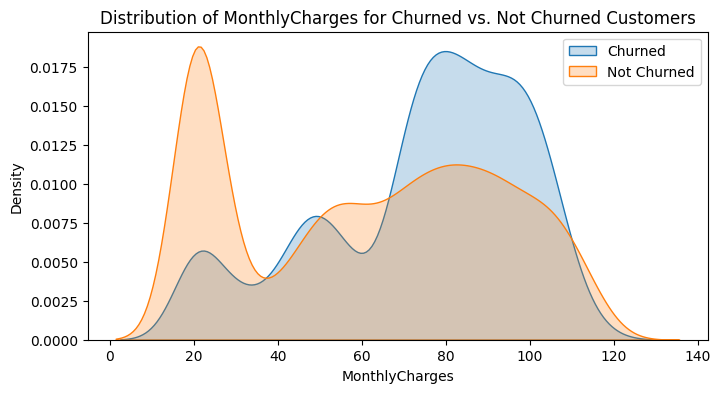

In [ ]:
for Col in non_categorical_variable_to_use:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 1][Col], label='Churned', shade=True)
    sns.kdeplot(numerical_customers_churn[numerical_customers_churn['Churn'] == 0][Col], label='Not Churned', shade=True)
    plt.title(f'Distribution of {Col} for Churned vs. Not Churned Customers')
    plt.legend()
    plt.show()

In [ ]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
number_of_empty_strings = 0
for column in customers.columns:
    # Loop through each row in the column
    for index, value in customers[column].items():
        # Check if the value is an empty string
        if value == " ":
            # Increment the counter if an empty string is found
            number_of_empty_strings += 1
print(f"The number of empty strings that can be found in this dataset is {number_of_empty_strings}")

The number of empty strings that can be found in this dataset is 11


Since there are some empty strings in my dataset, I would now try to fix these empty strings by replacing it with NaN

In [ ]:
from numpy import NaN
for column in customers.columns:
    customers[column].replace(" ", np.NaN, inplace=True)

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
customers.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

#**Now I would carry out my exploratory data analysis**





From studying the entire dataset, it can be concluded that the entire TotalCharges column is typically a float. However, its type is an object. So to make it much easier to cater for the lost values, I would now change all the the type of the TotalCharges to float


In [ ]:
customers['TotalCharges'] = customers['TotalCharges'].astype(float)

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Seeing as in this dataframe, there is no column where over 30% of the data were missing values. I can proceed to work with all the columns in the dataset.

In [ ]:
customers['TotalCharges'].interpolate(inplace=True)

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
non_categorical_variables = []
for col in customers.columns:
    if customers.dtypes[col] == 'int64':
      non_categorical_variables.append(col)
    elif customers.dtypes[col] == 'float64':
      non_categorical_variables.append(col)

for col in non_categorical_variables:
  print(col)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [ ]:
customers_churn_numerical = customers[non_categorical_variables].copy()
customers_churn_numerical['Churn'] = customers['Churn']
customers_churn_numerical['Churn'] = customers_churn_numerical['Churn'].map({'Yes': 1, 'No': 0})
customers_churn_numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [ ]:
customers_churn = customers.copy()

In [ ]:
customers_churn['Profile'] = customers['SeniorCitizen'].map({0: 'Not a Senior', 1: "Is a Senior"}) + ' ' + customers['gender'] + 'has a partner, and dependents' + customers['Dependents']

#**Checks**

In [ ]:
columns_to_encode = []
for col in customers.columns:
    if customers.dtypes[col] == 'object':
        columns_to_encode.append(col)

categorical_values = customers[columns_to_encode].copy()
categorical_values.drop('customerID', inplace=True, axis=1)
categorical_values

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
new_customers = customers.copy()
new_customers = new_customers.drop(columns="customerID")

In [ ]:
new_customers.drop(columns = categorical_values, inplace = True )
new_customers

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
label_encoder = LabelEncoder()
for column in categorical_values.columns:
    categorical_values[column] = label_encoder.fit_transform(categorical_values[column])

# Impute missing values
imp = SimpleImputer(strategy="most_frequent")
imputed_data = imp.fit_transform(categorical_values)

# Create a DataFrame with the imputed data
encoded_categorical = pd.DataFrame(imputed_data, columns=categorical_values.columns)

# Display the first 5 rows of the encoded DataFrame
print(encoded_categorical.head(5))

   gender  Partner  Dependents  PhoneService  MultipleLines  InternetService  \
0       0        1           0             0              1                0   
1       1        0           0             1              0                0   
2       1        0           0             1              0                0   
3       1        0           0             0              1                0   
4       0        0           0             1              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  Contract  PaperlessBilli

In [ ]:
encoded_customers = pd.concat([new_customers, encoded_categorical], axis = 1)
encoded_customers

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [ ]:
y = encoded_customers["Churn"]
X = encoded_customers.drop("Churn", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelrf = RandomForestClassifier(n_estimators=100, random_state=42)
modelrf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_train.shape

(5634, 19)

In [ ]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(X_train)
importances = modelrf.feature_importances_
feature_names = encoder.get_feature_names_out(X_train.columns)
# Sort them in descending order
indices = np.argsort(importances)[::-1]

"Let's display the ranking of feature importance."
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1} {X.columns[indices[i]]} ({importances[indices[i]]})")

Feature ranking:
1 TotalCharges (0.1924540381298149)
2 MonthlyCharges (0.17897309521304477)
3 tenure (0.1626548202811696)
4 Contract (0.07680633169646453)
5 PaymentMethod (0.05132351062336002)
6 OnlineSecurity (0.04177975903481105)
7 TechSupport (0.036451973373346755)
8 gender (0.027846730536747025)
9 InternetService (0.027747602049173054)
10 OnlineBackup (0.02712627405869372)
11 PaperlessBilling (0.026026955800461958)
12 Partner (0.024019758287159295)
13 MultipleLines (0.023165506225876462)
14 DeviceProtection (0.02218583699842017)
15 SeniorCitizen (0.020669208065953147)
16 Dependents (0.020390874312511232)
17 StreamingMovies (0.017938305278674814)
18 StreamingTV (0.01699215808233559)
19 PhoneService (0.005447261951981859)


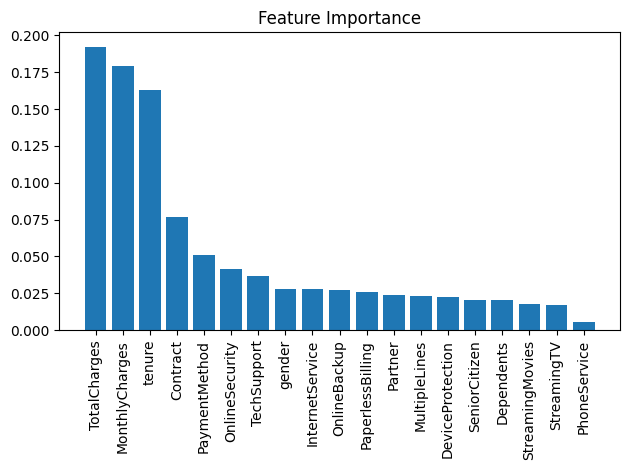

In [ ]:
plt.title('Feature Importance')
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Get the top 15 most important features
top_features_number = 15
top_features = [X.columns[indices[i]] for i in range(top_features_number)]

# Create a DataFrame with the top features from 'encoded_players21'
customers_churned = encoded_customers[top_features]
customers_churned

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,InternetService,OnlineBackup,PaperlessBilling,Partner,MultipleLines,DeviceProtection,SeniorCitizen
0,29.85,29.85,1,0,2,0,0,0,0,2,1,1,1,0,0
1,1889.50,56.95,34,1,3,2,0,1,0,0,0,0,0,2,0
2,108.15,53.85,2,0,3,2,0,1,0,2,1,0,0,0,0
3,1840.75,42.30,45,1,0,2,2,1,0,0,0,0,1,2,0
4,151.65,70.70,2,0,2,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,3,2,2,1,0,0,1,1,2,2,0
7039,7362.90,103.20,72,1,1,0,0,0,1,2,1,1,2,2,0
7040,346.45,29.60,11,0,2,2,0,0,0,0,1,1,1,0,0
7041,306.60,74.40,4,0,3,0,0,1,1,0,1,1,2,0,1


In [ ]:
sc = StandardScaler()

In [ ]:
X = sc.fit_transform(customers_churned)
X = pd.DataFrame(X,columns = customers_churned.columns)
y = encoded_customers["Churn"]
X

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,InternetService,OnlineBackup,PaperlessBilling,Partner,MultipleLines,DeviceProtection,SeniorCitizen
0,-0.994594,-1.160323,-1.277445,-0.828207,0.398558,-0.918838,-0.925262,-1.009559,-1.183234,1.242550,0.829798,1.034530,0.062723,-1.027910,-0.439916
1,-0.173889,-0.259629,0.066327,0.371271,1.334863,1.407321,-0.925262,0.990532,-1.183234,-1.029919,-1.205113,-0.966622,-0.991588,1.245111,-0.439916
2,-0.960038,-0.362660,-1.236724,-0.828207,1.334863,1.407321,-0.925262,0.990532,-1.183234,1.242550,0.829798,-0.966622,-0.991588,-1.027910,-0.439916
3,-0.195403,-0.746535,0.514251,0.371271,-1.474052,1.407321,1.396299,0.990532,-1.183234,-1.029919,-1.205113,-0.966622,0.062723,1.245111,-0.439916
4,-0.940841,0.197365,-1.236724,-0.828207,0.398558,-0.918838,-0.925262,-1.009559,0.172250,-1.029919,0.829798,-0.966622,-0.991588,-1.027910,-0.439916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.129315,0.665992,-0.340876,0.371271,1.334863,1.407321,1.396299,0.990532,-1.183234,-1.029919,0.829798,1.034530,1.117034,1.245111,-0.439916
7039,2.241646,1.277533,1.613701,0.371271,-0.537747,-0.918838,-0.925262,-1.009559,0.172250,1.242550,0.829798,1.034530,1.117034,1.245111,-0.439916
7040,-0.854871,-1.168632,-0.870241,-0.828207,0.398558,1.407321,-0.925262,-1.009559,-1.183234,-1.029919,0.829798,1.034530,0.062723,-1.027910,-0.439916
7041,-0.872458,0.320338,-1.155283,-0.828207,1.334863,-0.918838,-0.925262,0.990532,0.172250,-1.029919,0.829798,1.034530,1.117034,-1.027910,2.273159


#**Model Training**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
def create_model(input_shape):
    # Define the input layer
    input_layer = Input(shape=(input_shape,))
    # Define the hidden layers
    x = Dense(64, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    # Define the output layer
    output_layer = Dense(1, activation='sigmoid')(x)
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
input_shape = (X_train.shape[1])
input_shape

15

In [ ]:
mlp_model = create_model(input_shape)

# Compile the model
optimizer = Adam(learning_rate=0.001)
mlp_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
mlp_model.fit(X_train, y_train,
                        batch_size=32,
                        epochs=50,
                        validation_split=0.2,
                        verbose=1)  # Set to 1 to see the progress bar

Epoch 1/50
141/141 [==============================] - 7s 18ms/step - loss: 0.5989 - accuracy: 0.6896 - val_loss: 0.4799 - val_accuracy: 0.7587
Epoch 2/50
141/141 [==============================] - 2s 13ms/step - loss: 0.4991 - accuracy: 0.7542 - val_loss: 0.4322 - val_accuracy: 0.7986
Epoch 3/50
141/141 [==============================] - 2s 14ms/step - loss: 0.4809 - accuracy: 0.7735 - val_loss: 0.4254 - val_accuracy: 0.7933
Epoch 4/50
141/141 [==============================] - 1s 9ms/step - loss: 0.4739 - accuracy: 0.7737 - val_loss: 0.4244 - val_accuracy: 0.7950
Epoch 5/50
141/141 [==============================] - 1s 9ms/step - loss: 0.4689 - accuracy: 0.7795 - val_loss: 0.4218 - val_accuracy: 0.7977
Epoch 6/50
141/141 [==============================] - 1s 8ms/step - loss: 0.4622 - accuracy: 0.7797 - val_loss: 0.4206 - val_accuracy: 0.7959
Epoch 7/50
141/141 [==============================] - 1s 8ms/step - loss: 0.4604 - accuracy: 0.7741 - val_loss: 0.4178 - val_accuracy: 0.7933
Epo

In [ ]:
# Evaluate the model on the test set
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

y_prob = mlp_model.predict(X_test)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc_score)

45/45 [==============================] - 0s 3ms/step
AUC Score: 0.8562539464013996


In [ ]:
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Define the MLP model
def create_model(neurons=32, learning_rate=0.001, optimizer='adam', dropout_rate=0.5):
    input_layer = Input(shape=(X_train.shape[1],))
    x = Dense(neurons)(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Choose optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    #history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, class_weight=class_weights)
    #return model, history
    return model


# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'model__neurons': [32, 64, 128],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__optimizer': ['adam', 'sgd'],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'epochs': [50, 100],
    'batch_size': [64, 128]
}


In [ ]:
# Create StratifiedKFold for cross-validation
kfold_splits = 5
kfold = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=kfold, scoring='roc_auc')

# Fit the GridSearchCV (no need to pass class_weight directly here)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
print("Test AUC Score: ", auc_score)

In [ ]:
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

def create_best_model():
    input_layer = Input(shape=(X_train.shape[1],))
    x = Dense(best_params['model__neurons'])(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(best_params['model__dropout_rate'])(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Choose optimizer with the best learning rate
    if best_params['model__optimizer'] == 'adam':
        opt = Adam(learning_rate=best_params['model__learning_rate'])
    elif best_params['model__optimizer'] == 'sgd':
        opt = SGD(learning_rate=best_params['model__learning_rate'])

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the best model
best_model = create_best_model()
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)


In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
auc_score_retest = roc_auc_score(y_test, y_pred)
print("Retest AUC Score: ", auc_score_retest)

NameError: ignored

In [ ]:
with open('churning_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [ ]:
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [ ]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
from google.colab import files
files.download('churning_model.pkl')
files.download('standard_scaler.pkl')
files.download('onehot_encoder.pkl')
files.download('label_encoder.pkl')